# First, check the definition of regular graph

[Regular Graph?](https://seoyeonc.github.io/sy_hub/posts/2_Studies/GRAPH/2023-06-30-Regular%20Graph.html)

> Summary

- Euclidean data
    - underlying function이 regular graph로 정의가 가능한 data
    - underline(domain)이 euclidean domain에 위치한 데이터(x축, 1d-grid, 2d-grid 등)
    - euclidean distance로 계산할 수 있는 data
- Non-Euclidean data
    - underlying function이 regular graph로 정의가 가능하지 않은 data
    - underline(domain)이 non-euclidean domain에 위치한 데이터(곡선, 곡면 등)
    - euclidean distance calculation이 not reasonable한 data

::: {.callout-important}
# Graph vs Manifold

- 굳이 포함관계를 따지자면, Non-Euclidean > Graph > Manifold
- Non-Euclidean
  - Graph
    - 거리는 Edge 나 weight 로 정의함.
      - Manifold(ex. swiss roll, 아래 예시 있음!)
        1. underline = domain(swiss roll에서 말린 곡면)
        2. underlying function = color(swiss roll에서 무지개 색)
        3. 유한한 그래프 시그널로 표현 가능
            - 무한한 노드에서 realization sample 뽑고,
            - 그래프로 가져오려면 distance 정의 수정이 필요하다.
              - 수정하는 방법
                1. $W_{i,j} = \begin{cases} \exp\left(-\frac{\|{\boldsymbol v}_i -{\boldsymbol v}_j\|^2}{2\theta^2}\right) & \|{\boldsymbol v}_i -{\boldsymbol v}_j\|^2 \le \kappa \\ 0 & o.w\end{cases}$를 사용하여 가까운 것만 거리 계산하도록 하기, 곡선은 유클리디안 거리를 semi 사용하고(이 식에서 $\kappa$로 먼 거리는 자르니까), 곡면은 하버사인 거리를 사용.
                2. similarity(유사도) 따지기(ex. 몇 번 건너서 다음 노드로 가는지 등)
:::

# Import

In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Non-Euclidean vs Euclidean

## Euclidean

### Ex1) 1D grid

> Text, etc.

![Figure: Sentence, word, sound: 1D Euclidean domains. This image is sourced from the  [PAM Workshop “New Deep Learning Techniques” Feb 7th 2017](http://helper.ipam.ucla.edu/publications/dlt2018/dlt2018_14506.pdf)](Figs/1dgrid.png){width=70%}

In [192]:
w=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        if i==j :
            w[i,j] = 0
        elif i-j == 1 : 
            w[i,j] = 1

In [193]:
lst = []
for i in range(5):
    for j in range(5):
        if w[i,j] == 1:
            lst.append([i,j])

In [194]:
d= w.sum(axis=1)
D= np.diag(d)

::: {.callout-note}
모든 Degree가 동일한, 특히 단위행렬로 나오는(Regular graph인) 유클리디안 데이터
:::

In [195]:
D

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [196]:
G = nx.Graph()

In [197]:
G.add_edges_from(np.array(lst))

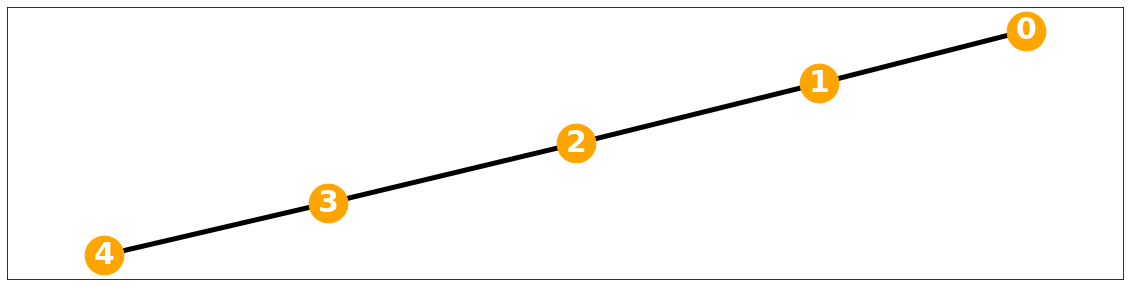

In [198]:
plt.figure(figsize=(20, 5)) 
nx.draw_networkx(G, with_labels=True, font_weight='bold', node_color='orange', node_size=1500, font_color='white', font_size=30,width=5)

### Ex2) 2d grids

> Image, etc.

![Figure: Image, volume, video: 2D, 3D, 2D+1 Euclidean domains. This image is sourced from the [PAM Workshop “New Deep Learning Techniques” Feb 7th 2017](http://helper.ipam.ucla.edu/publications/dlt2018/dlt2018_14506.pdf)](Figs/2dgrid.png){width=80%}

In [221]:
w = np.ones((4, 4))
for i in range(4):
    for j in range(4):
        if i==j :
            w[i,j] = 0

In [222]:
lst = []
for i in range(4):
    for j in range(4):
        if w[i,j] == 1:
            lst.append([i,j])

In [223]:
d= w.sum(axis=1)
D= np.diag(d)

::: {.callout-note}
모든 Degree가 동일하여 $D = 3I$로 표현되는(Regular graph인) 유클리디안 데이터
:::

In [224]:
D

array([[3., 0., 0., 0.],
       [0., 3., 0., 0.],
       [0., 0., 3., 0.],
       [0., 0., 0., 3.]])

In [225]:
G = nx.Graph()

In [226]:
G.add_edges_from(np.array(lst))

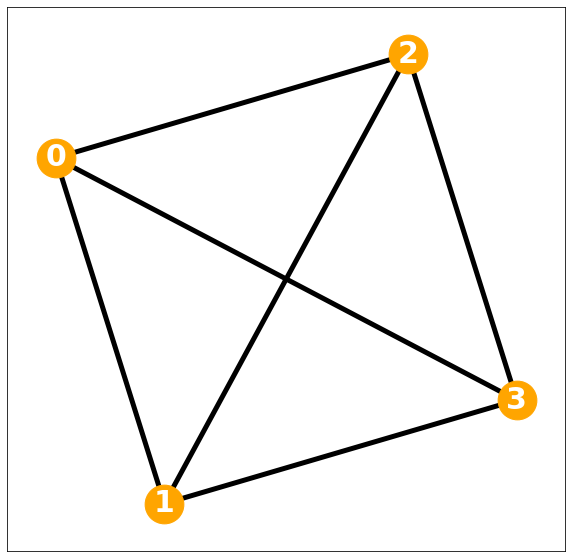

In [227]:
plt.figure(figsize=(10, 10)) 
nx.draw_networkx(G, with_labels=True, font_weight='bold', node_color='orange', node_size=1500, font_color='white', font_size=30,width=5)

## Non-Euclidean

### Ex3) Different Weights

> Weight 같다고 가정하고 그래프 시각화

In [2]:
w=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        if i==j :
            w[i,j] = 0
        elif i!=j: 
            w[i,j] = 1

In [3]:
lst = []
for i in range(5):
    for j in range(5):
        if w[i,j] == 1:
            lst.append([i,j])

In [4]:
G = nx.Graph()

In [5]:
G.add_edges_from(np.array(lst))

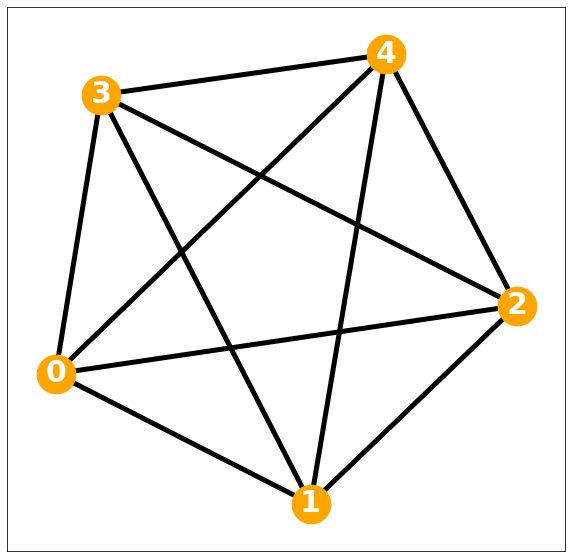

In [9]:
plt.figure(figsize=(10, 10)) 
nx.draw_networkx(G, with_labels=True, font_weight='bold', node_color='orange', node_size=1500, font_color='white', font_size=30,width=5)

In [10]:
pi=np.pi
ang=np.linspace(-pi,pi-2*pi/5,5)
r=5+np.cos(np.linspace(0,12*pi,5))
vx=r*np.cos(ang)
vy=r*np.sin(ang)
f1=10*np.sin(np.linspace(0,6*pi,5))
f = f1 + np.random.normal(5)

In [11]:
D = np.zeros([5,5])
locations = np.stack([vx, vy],axis=1)
for i in range(5):
    for j in range(i,5):
        D[i,j]=np.linalg.norm(locations[i]-locations[j])
D = D + D.T

In [12]:
D

array([[ 0.        ,  6.0964895 , 11.4126782 ,  9.53062515,  7.05342303],
       [ 6.0964895 ,  0.        ,  6.0964895 ,  7.60845213,  9.53062515],
       [11.4126782 ,  6.0964895 ,  0.        ,  6.0964895 , 11.4126782 ],
       [ 9.53062515,  7.60845213,  6.0964895 ,  0.        ,  6.0964895 ],
       [ 7.05342303,  9.53062515, 11.4126782 ,  6.0964895 ,  0.        ]])

::: {.callout-note}
가중치 값이 다 다르게 형성되어 있다. 따라서 $D=kI$형태로도 표현할 수 없어 레귤러 메트릭스의 정의를 충족하지 못하며, 이는 비유클리디안 데이터이다.
:::

### Ex3) Non-Euclidean data with Non-Euclidean domain

> degree matrix가 단위행렬이 아니어서 레귤러 그래프가 아닌 그래프

#### 1. 3D shape, Manifold

> 도메인이 표면(컵)이며, underlying function 이 regular graph로 정의되지 않는다.

[reference](https://graphics.stanford.edu/courses/cs468-20-fall/)

![Figure: Surface (non-Euclid data). This image is sourced from the (Fall 2020 course website for Non-Euclidean Methods in Machine Learning (CS468), Stanford University)](Figs/surfaces.png){width=80%}

#### 2. 3D shape, Manifold

> 도메인이 구로 형성되어 있고, graph로 인지 시, underlying function 이 색(파란색)으로 볼 수 있고, 다른 색으로 구성된 것은 $\eta$로 볼 수 있고, regular graph로 정의되지 않는다.

*간단 $\eta$ 정의 review = noise 이지만, 특정 i에서 값이 큰 nois를 갖음*

![Figure: Distributions on 3D shapes (non-Euclid data). This image is sourced from the [Fall 2020 course website for Non-Euclidean Methods in Machine Learning (CS468), Stanford University](https://graphics.stanford.edu/courses/cs468-20-fall/)](Figs/distributions.png){width=80%}

#### 3. 3D shape, Manifold

> 도메인이 표면(고양이)이며, underlying function 이 색이라고 할 수 있다.

![Figure: Functions on manifolds (non-Euclid data). This image is sourced from the [Fall 2020 course website for Non-Euclidean Methods in Machine Learning (CS468), Stanford University](https://graphics.stanford.edu/courses/cs468-20-fall/)](Figs/functions_on_manifolds.png){width=80%}

#### 4. 3D shape, Manifold

> 도메인이 표면이며, underlying function 이 색이다. graph로 볼 때 regular graph로 정의되지 않는다.

[reference](https://graphics.stanford.edu/courses/cs468-20-fall/)

![Figure: General manifolds (non-Euclid data). This image is sourced from the (Fall 2020 course website for Non-Euclidean Methods in Machine Learning (CS468), Stanford University)](Figs/general_manifolds.png){width=80%}

#### 5. Graph

> 도메인이 노드인 graph. underlying function 은 정의할 수 없지만 굳이 따지자면 Classification work. 신경망 모양..

[reference](https://graphics.stanford.edu/courses/cs468-20-fall/)

![Figure: Graphs networks (non-Euclid data). This image is sourced from the [Fall 2020 course website for Non-Euclidean Methods in Machine Learning (CS468), Stanford University]](Figs/graphs_networks.png){width=80%}

#### 6. Graph(Manifold?)

> 위의 정의 참고, 노드가 도메인인 graph. 색이 underlying function.

Swiss roll (non-euclid data) from [@das2021nonlinear]

![Figure: Swiss roll (non-euclid data) from @das2021nonlinear](Figs/swiss_roll.png){width=80%}

#### 7. Graph

> 도메인이 노드이며, classification work

![Figure: Brain network (non-Euclid data) from @ginestet2014statistical](https://www.frontiersin.org/files/Articles/61343/fncom-08-00051-HTML/image_m/fncom-08-00051-g003.jpg){width=80%}

#### 8. Graph Signal

> 도메인이 노드(택시 탄 장소)이며, underlying function 이 색(택시 픽업 얼마나 하는지를 나타냄, 많이 할 수록 레드쪽으로) regular graph로 정의되지 않는다. 

![Figure: Taxi-pickup distribution in Manhattan (non-euclid data) from @ortega2018graph](Figs/Manhattan.png){width=80%}

#### 9. Graph signal, spatiotemporal data

> 도메인이 노드(sequence)이며, underlying function 이 regular graph로 정의되지 않는다.(파란색인 양의 signal, 검정색인 음의 signal로 mapping되어 있는 graph signal의 형태)

![Figure: Minnesota road graph (non-euclid data) from Shuman et al.[-@shuman2013emerging]](Figs/Minnesota_road_graph.png){width=80%}

#### 10. Graph(Sequence), dynamic spatiotemporal data

> 도메인이 표면(사람,motion을 sequence로 전달)이며, dynamic spatiotemporal data

![Figure: 3D point cloud sequence (non-euclid data) from [@ortega2018graph]](Figs/point_cloud.png){width=80%}

# Appendix

**Difficulties in analyzing non-Euclidean data**

Analyzing non-Euclidean data is one of the most popular topics in recent years. These are collectively referred to as geometric deep learning [@bronstein2017geometric],[@cao2020comprehensive], graph signal processing [@shuman2013emerging], and graph learning [@xia2021graph]. 

![Figure. Classical CNN (left) and geometric CNN](Figs/gc.png){width=80%}